Problem statement:
Predict the duration of each trip in NYC at the point when the trip starts

Why do you need to predict the duration of each trip in the NYC?
Helps plan the fleet in a much better manner 

How?
Knowing the time when the trip would end and the location where the trip would end the fleet can be planned accordingly

Hypothesis (List of all the variables that would influence the trips of taxi ride):
1. The weekends have less trip duration than the weekdays.
2. The day of the week effect the duration of the trip.
3. The time of pickup(morning, afternoon, evening) effect the duration of the trip.
4. The week of the month have effect on the duration of the trip.
5. The month of the year have effect on the duration of the trip.
6. The pickup location effect the duration of the trip.
7. The drop location effect the duration of the trip.
8. The distance between the pickup and the drop loaction effect the duration of the trip.
9. The traffic conditions effect the duration of the trip.
10. The vendor of the taxi effect the duration of the trip.
11. The number of passengers in the taxi effect the duration of the trip.
12. The weather conditions effect the duration of the trip.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# importing data
data = pd.read_csv('F:\\Python\Project\\Resources-NYC Taxi Trip Project\\EDA_NYC_Taxi\\nyc_taxi_trip_duration.csv')

In [3]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
print(f'We have {data.shape[0]} rows amd {data.shape[1]} columns')

We have 729322 rows amd 11 columns


In [5]:
# printing all the columns present in the data
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [6]:
# checking for missing values
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
# check datatypes
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [8]:
# identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

In [9]:
# identifying variables with float datatype
data.dtypes[data.dtypes == 'float64']

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
dtype: object

In [10]:
# converting id and store_and _fwd_flag to category
data['id'] = data['id'].astype('category')

In [11]:
data[['id']].dtypes

id    category
dtype: object

In [12]:
# converting strings to datetime features
data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)
data['dropoff_datetime'] = pd.to_datetime(data.dropoff_datetime)

# converting yes/no flag to 1 and 0
data['store_and_fwd_flag'] = 1 * (data.store_and_fwd_flag == 'Y')

# checking if there is any inconsistency in trip duration
data['check_trip_duration'] = (data['dropoff_datetime'] - data['pickup_datetime']).map(lambda x : x.total_seconds())

duration_difference = data[np.abs(data['check_trip_duration'].values - data['trip_duration'].values) > 1]

duration_difference.shape


(0, 12)

This implies there is no inconsistency in data wrt drop location and trip duration

In [13]:
# target variable
print('The range of trip duration: ({},{})'.format(round(data['trip_duration'].min()/3600,6),round(data['trip_duration'].max()/3600,6)))  # trip duration in hours
print('Mean of trip duration: {}'.format(round(data['trip_duration'].mean()/3600,6)))
print('Median of trip duration: {}'.format(round(data['trip_duration'].median()/3600,6)))
print('Standard Deviation of trip duration: {}'.format(round(data.trip_duration.std()/3600,6)))

The range of trip duration: (0.000278,538.815556)
Mean of trip duration: 0.264508
Median of trip duration: 0.184167
Standard Deviation of trip duration: 1.073507


There is a trip duration of 538 hours which is a huge outlier and might create problems at prediction stage. One idea is to transform the trip duration before prediction to visualize it better.

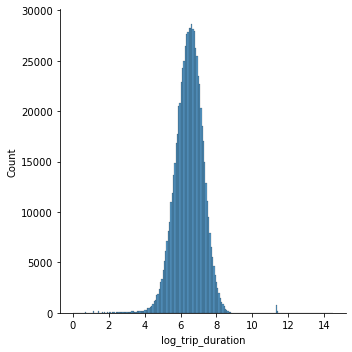

In [14]:
# log transform the trip duration
data['log_trip_duration'] = np.log(data.trip_duration.values )
sns.displot(data['log_trip_duration'], kde = False, bins = 200)
plt.show()

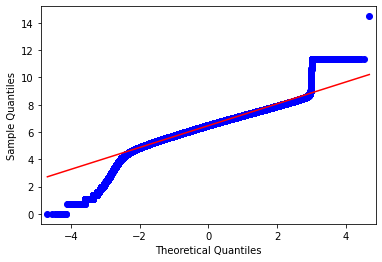

In [15]:
sm.qqplot(data['log_trip_duration'],line='s')
plt.show()

In [16]:
# checking the range of pickup_datetime
data['pickup_datetime'].min() , data['pickup_datetime'].max()

(Timestamp('2016-01-01 00:01:14'), Timestamp('2016-06-30 23:59:37'))

There trips are for the first 6 months of 2016.

In [17]:
# extracting new columns from pickup_datetime

# day of week of pickup
data['pickup_dow'] = data['pickup_datetime'].dt.weekday

# month of year of pickup
data['pickup_month'] = data['pickup_datetime'].dt.month

# hour of day of pickup
data['pickup_hour'] = data['pickup_datetime'].dt.hour

In [18]:
# checking new extracted columns
data[['pickup_datetime','pickup_dow','pickup_month','pickup_hour']].head()

,pickup_datetime,pickup_dow,pickup_month,pickup_hour
0,2016-02-29 16:40:21,0,2,16
1,2016-03-11 23:35:37,4,3,23
2,2016-02-21 17:59:33,6,2,17
3,2016-01-05 09:44:31,1,1,9
4,2016-02-17 06:42:23,2,2,6


In [19]:
data.dtypes

id                           category
vendor_id                       int64
pickup_datetime        datetime64[ns]
dropoff_datetime       datetime64[ns]
passenger_count                 int64
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
store_and_fwd_flag              int32
trip_duration                   int64
check_trip_duration           float64
log_trip_duration             float64
pickup_dow                      int64
pickup_month                    int64
pickup_hour                     int64
dtype: object

### Univariate visualization

C:\Users\RKO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RKO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RKO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


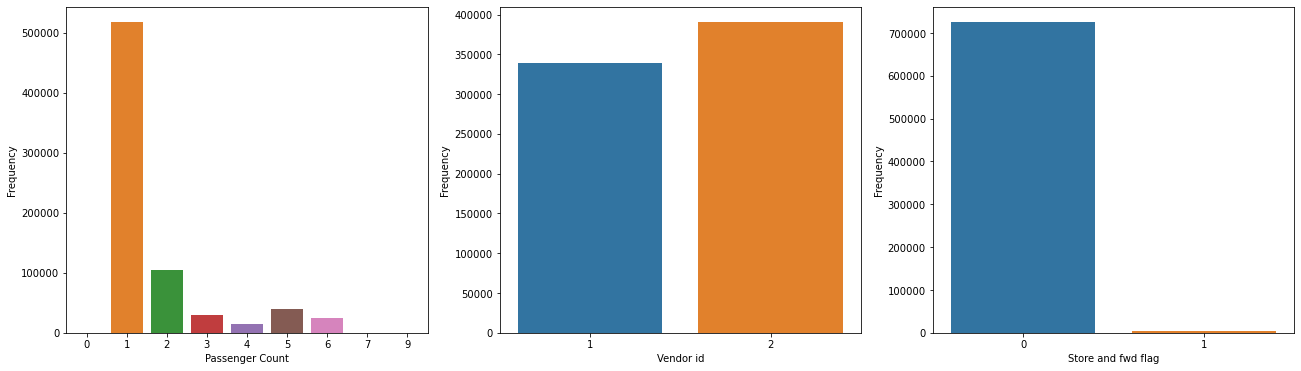

In [20]:
# Binary features

# setting image resolution
plt.figure(figsize=(22,6))

# Passenger Count
plt.subplot(131)
sns.countplot(data['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')

# vendor_id
plt.subplot(132)
sns.countplot(data['vendor_id'])
plt.xlabel('Vendor id')
plt.ylabel('Frequency')

# store_and_fwd_flag
plt.subplot(133)
sns.countplot(data['store_and_fwd_flag'])
plt.xlabel('Store and fwd flag')
plt.ylabel('Frequency')

plt.show()

### Observations
* Most of the trips involve only 1 passenger. There are trips with 7-9 passenger but they are very low.
* Vendor 2 has more number of trips as compared to vendor 1.
* The store_and_fwd_flag values show that there was very less trip data held in the memory of the taxi and most of the data was sent immediately to the vendor.

C:\Users\RKO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RKO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RKO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


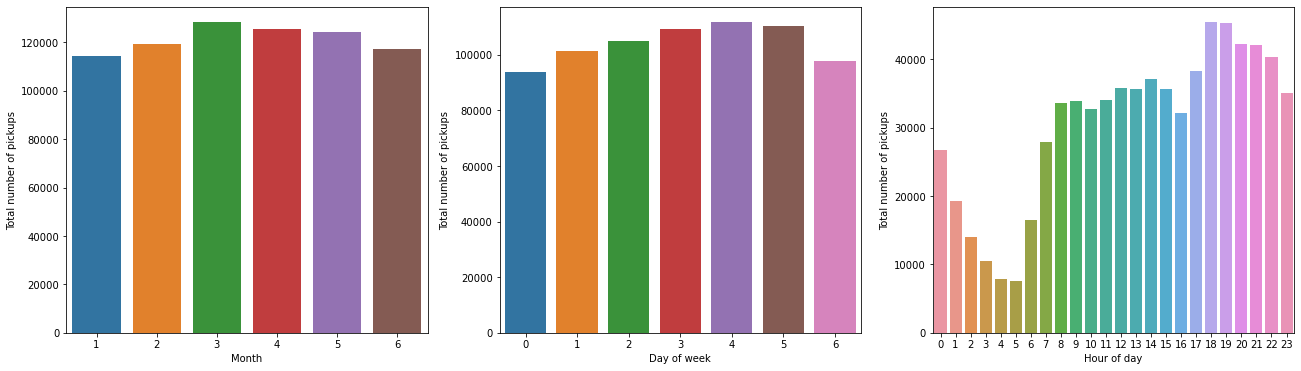

In [21]:
# Datetime features

plt.figure(figsize=(22,6))

# pickup month
plt.subplot(131)
sns.countplot(data['pickup_month'])
plt.xlabel('Month')
plt.ylabel('Total number of pickups')

# pickup day of week
plt.subplot(132)
sns.countplot(data['pickup_dow'])
plt.xlabel('Day of week')
plt.ylabel('Total number of pickups')

# pickup hour of day
plt.subplot(133)
sns.countplot(data['pickup_hour'])
plt.xlabel('Hour of day')
plt.ylabel('Total number of pickups')

plt.show()

### Observations
* The number of pickups is more or less equal every month. The peak is in March.
* The number of pickups in the weekdays is greater than the number of pickups in the weekends. The peak is on Thursday.
* The number of pickups is highest in the late evenings and much lower in the morning hours.

## Latitude and longitude 

C:\Users\RKO\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RKO\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RKO\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

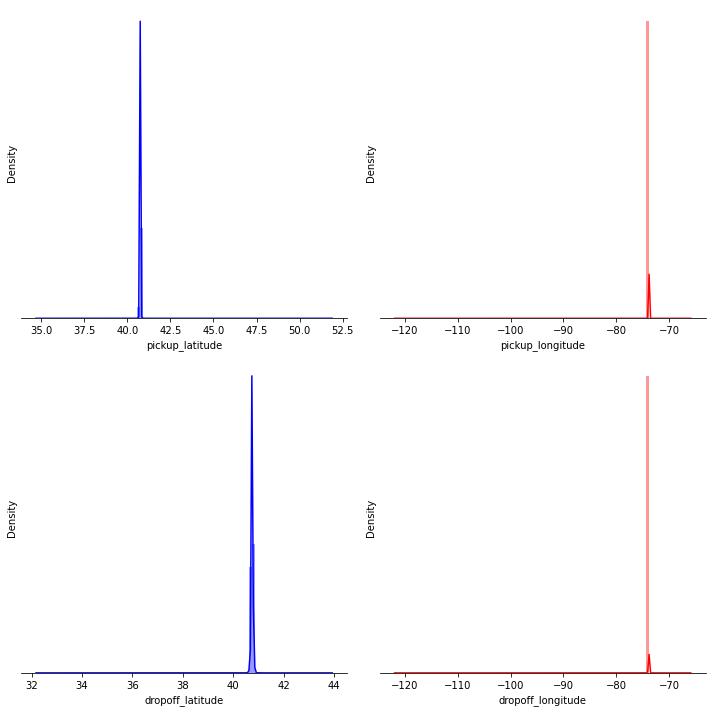

In [22]:
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(data['pickup_latitude'].values, axlabel = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sns.distplot(data['pickup_longitude'].values, axlabel = 'pickup_longitude',color="r",bins =100, ax=axes[0,1])
sns.distplot(data['dropoff_latitude'].values, axlabel = 'dropoff_latitude',color="b",bins =100, ax=axes[1,0])
sns.distplot(data['dropoff_longitude'].values, axlabel = 'dropoff_longitude',color="r",bins =100, ax=axes[1,1])
plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()

### Observations (blue represents pickup and dropoff latitude and red represents pickup and dropoff longitude)
* From the plot it is clear that the pickup and dropoff latitude is centered around 40 to 41, and longitude around -74 to -73.
* There are extreme values present which has squeezed the plot such that we see a spike.
* A good idea is to remove the outliers and look more closely.

C:\Users\RKO\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RKO\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RKO\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

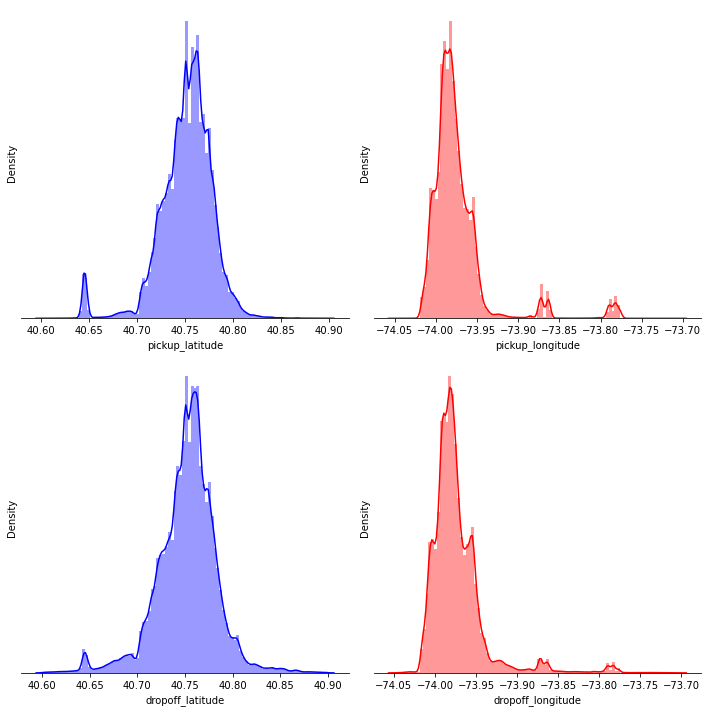

In [23]:
# Removing outliers to visualize these plots
new_data = data.copy()
new_data = new_data.loc[(new_data.pickup_latitude > 40.6) & (new_data.pickup_latitude < 40.9)]
new_data = new_data.loc[(new_data.dropoff_latitude>40.6) & (new_data.dropoff_latitude < 40.9)]
new_data = new_data.loc[(new_data.dropoff_longitude > -74.05) & (new_data.dropoff_longitude < -73.7)]
new_data = new_data.loc[(new_data.pickup_longitude > -74.05) & (new_data.pickup_longitude < -73.7)]

f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(new_data['pickup_latitude'].values, axlabel = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sns.distplot(new_data['pickup_longitude'].values, axlabel = 'pickup_longitude',color="r",bins =100, ax=axes[0,1])
sns.distplot(new_data['dropoff_latitude'].values, axlabel = 'dropoff_latitude',color="b",bins =100, ax=axes[1,0])
sns.distplot(new_data['dropoff_longitude'].values, axlabel = 'dropoff_longitude',color="r",bins =100, ax=axes[1,1])
plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()

We have a much better view of the distribution. Most trips are concentrated between these laltitude and longitude only with a few significant clusters.

# Bivariate analysis

### Trip Duration vs Day of week

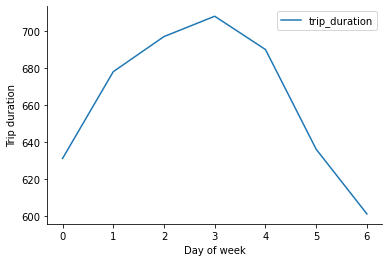

In [24]:
dow_average_duration = pd.DataFrame(data.groupby(['pickup_dow'])['trip_duration'].median())

sns.lineplot(data = dow_average_duration)
plt.xlabel('Day of week')
plt.ylabel('Trip duration')
sns.despine(bottom = False)
plt.show()

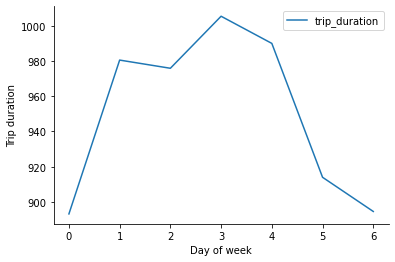

In [25]:
dow_average_duration = pd.DataFrame(data.groupby(['pickup_dow'])['trip_duration'].mean())

sns.lineplot(data = dow_average_duration)
plt.xlabel('Day of week')
plt.ylabel('Trip duration')
sns.despine(bottom = False)
plt.show()

Inferences:
* The trip duration is higher during the weekdays than the weekends.
* The peak of trip duration is on Wednesday.

### Trip Duration vs Hour of the day

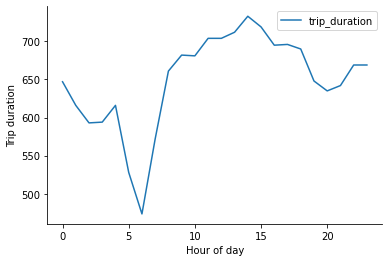

In [26]:
hourly_average_duration = pd.DataFrame(data.groupby(['pickup_hour'])['trip_duration'].median())
sns.lineplot(data = hourly_average_duration)
plt.xlabel('Hour of day')
plt.ylabel('Trip duration')
sns.despine(bottom = False)
plt.show()

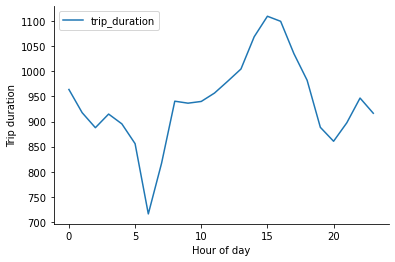

In [27]:
hourly_average_duration = pd.DataFrame(data.groupby(['pickup_hour'])['trip_duration'].mean())
sns.lineplot(data = hourly_average_duration)
plt.xlabel('Hour of day')
plt.ylabel('Trip duration')
sns.despine(bottom = False)
plt.show()

Inferences:
* Trip duration is lower in late night and early morning hours that can be attributed to low traffic density.
* It shows a similar pattern when compared to the number of pickups indicating a correlation between the number of pickups and trip duration.

### Trip duration vs Month

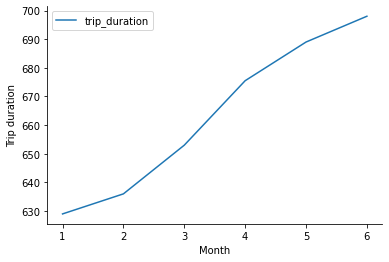

In [28]:
monthly_average_duration = pd.DataFrame(data.groupby(['pickup_month'])['trip_duration'].median())
sns.lineplot(data = monthly_average_duration)
plt.xlabel('Month')
plt.ylabel('Trip duration')
sns.despine(bottom = False)
plt.show()

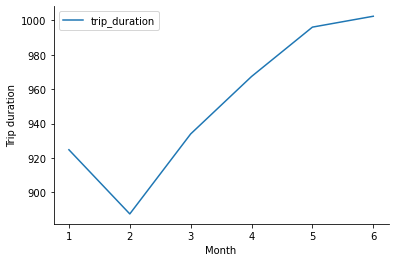

In [29]:
monthly_average_duration = pd.DataFrame(data.groupby(['pickup_month'])['trip_duration'].mean())
sns.lineplot(data = monthly_average_duration)
plt.xlabel('Month')
plt.ylabel('Trip duration')
sns.despine(bottom = False)
plt.show()

Inferences:
* The trip duration increases as the months passes by.

### Vendor id vs Trip duration

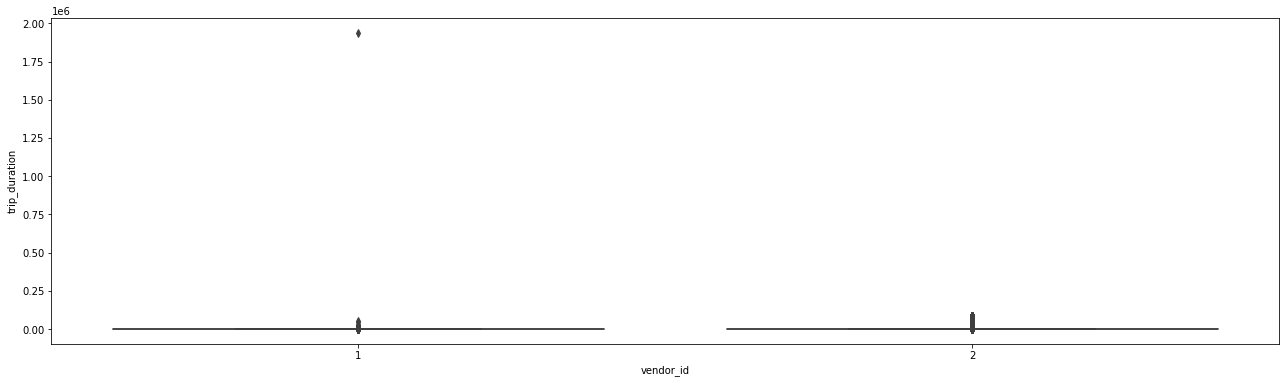

In [30]:
plt.figure(figsize=(22, 6))
sns.boxplot(x="vendor_id", y="trip_duration", data=data)
plt.show()

There are many outliers for both both vendor 1 and 2.
There could be 2 solutions to this:
* Remove the huge outliers and plot again
* Look at median trip duration for both vendors on hourly basis

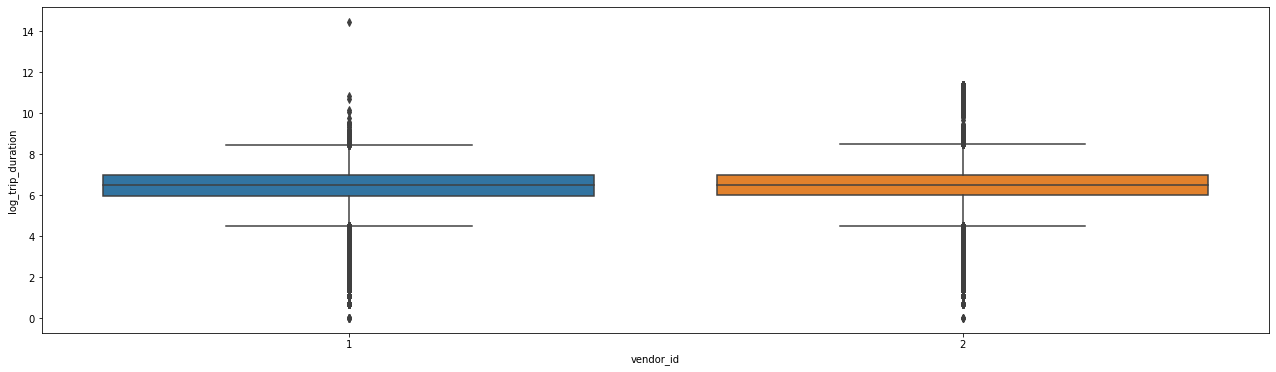

In [31]:
# plot for log_trip_duration
plt.figure(figsize=(22, 6))
sns.boxplot(x="vendor_id", y="log_trip_duration", data=data)
plt.show()

The plot looks much better when used log of trip duration.
* The plot for both vendor 1 and 2 looks similar with medians at 600 seconds.

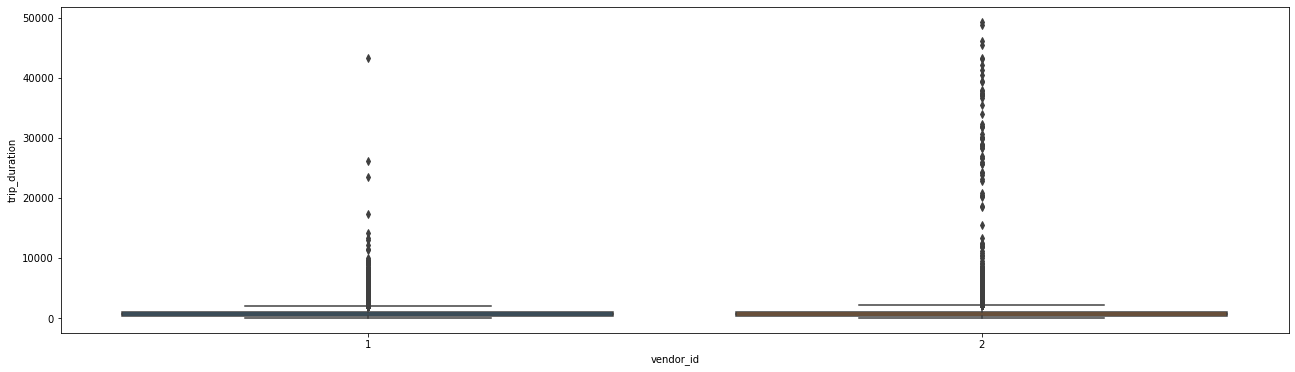

In [32]:
# removing values above 50000
plt.figure(figsize=(22, 6))
data_sub = data[data['trip_duration'] < 50000]
sns.boxplot(x="vendor_id", y="trip_duration", data=data_sub)
plt.show()

We see vendor 2 has much more outliers than vendor 1.

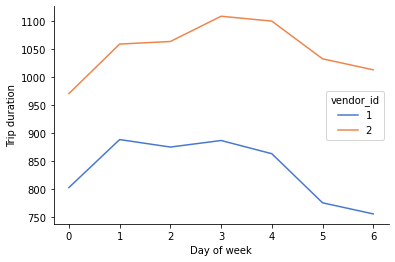

In [33]:
# Mean trip duration Vendor wise

vendorid_dow_avg_duration = pd.DataFrame(data.groupby(['vendor_id','pickup_dow'])['trip_duration'].mean())
sns.lineplot(data = vendorid_dow_avg_duration,x = 'pickup_dow', y = 'trip_duration' ,hue = 'vendor_id', palette='muted')
plt.xlabel('Day of week')
plt.ylabel('Trip duration')
sns.despine(bottom = False)
plt.show()

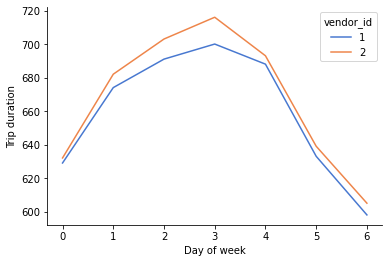

In [34]:
# Median trip duration Vendor wise

vendorid_dow_avg_duration = pd.DataFrame(data.groupby(['vendor_id','pickup_dow'])['trip_duration'].median())
sns.lineplot(data = vendorid_dow_avg_duration,x = 'pickup_dow', y = 'trip_duration' ,hue = 'vendor_id', palette='muted')
plt.xlabel('Day of week')
plt.ylabel('Trip duration')
sns.despine(bottom = False)
plt.show()

Median trip duration does not vary much but mean trip duration does vary for vendor 1 and vendor 2.

### Trip duration vs Passenger count

In [35]:
data.passenger_count.value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

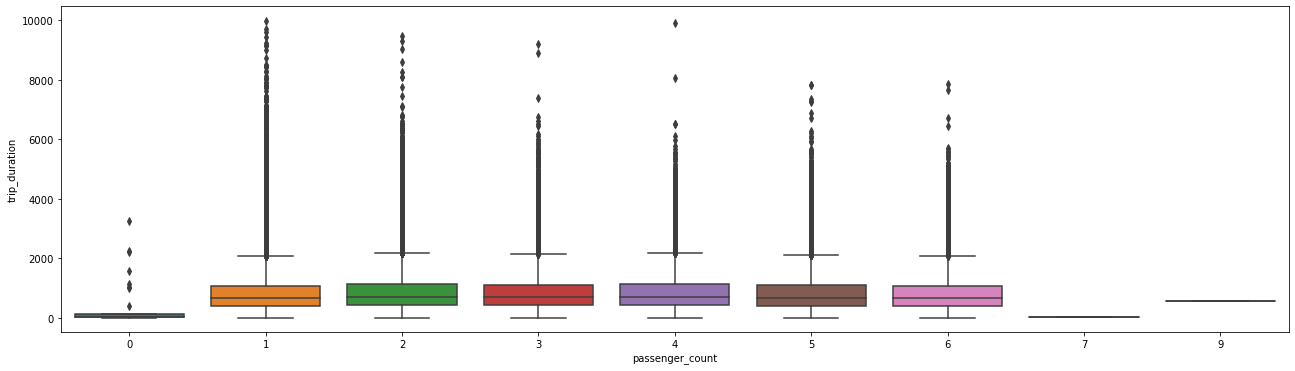

In [36]:
# plotting for trip duration less than 10000 seconds
plt.figure(figsize=(22, 6))
data_sub = data[data['trip_duration'] < 10000]
sns.boxplot(x="passenger_count", y="trip_duration", data=data_sub)
plt.show()


The boxplot clearly shows that there not much of a difference in distribution for the most frequently occuring passenger count values - 1, 2, 3, 4, 5, 6.

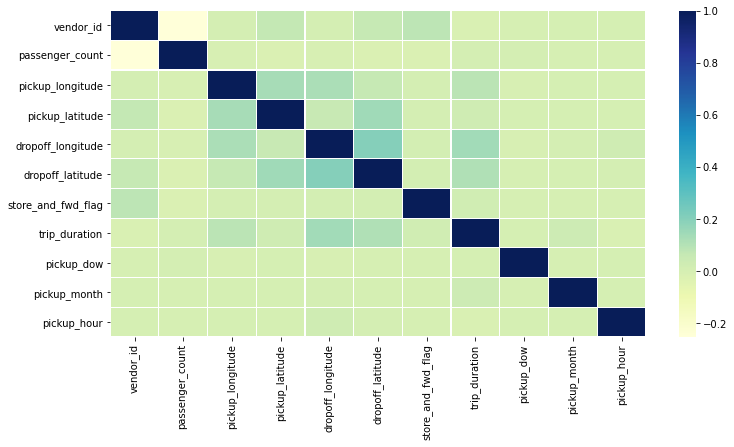

In [37]:
plt.figure(figsize=(12, 6))
data_sub = data.drop(['id', 'pickup_datetime', 'dropoff_datetime','check_trip_duration','log_trip_duration'],axis=1)
corr = data_sub.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

There is not any significant correlation between the variables.

### Conclusion:
1. The majority of rides follow a rather smooth distribution that looks almost log-normal with a peak just around about 17 minutes.
2. There are several suspiciously short rides with less than 10 seconds duration and there are a few huge outliers near 12.
3. Most of the trips involve only 1 passenger. There are trips with 7-9 passengers but they are very low in number.
4. Vendor 2 has more number of trips as compared to vendor 1
5. Number of pickups for weekends is much lower than week days with a peak on Thursday.
6. Number of pickups as expected is highest in late evenings. However, it is much lower during the morning peak hours.
7. The number of pickups is more or less equal every month. The peak is in March.
8. From the plot it is clear that the pickup and dropoff latitude is centered around 40 to 41, and longitude around -74 to -73 only with a few significant clusters. These clusters are represented by the numerous peaks in the lattitude and longitude histograms
9. Trip durations are definitely shorter for late night and early morning hours that can be attributed to low traffic density
10. It follows a similar pattern when compared to number of pickups indicating a correlation between number of pickups and trip duration
11. The trip duration increases as the months passes by.
12. Median trip duration does not vary much as can be seen from the above plot for different vendors.
13. The boxplot clearly shows that there not much of a difference in distribution for the most frequently occuring passenger count values - 1, 2, 3, 4, 5, 6.
14. From the correlation heatmap we see that the lattitude and longitude features have higher correlation with the target as compared to the other features but not that significant.